## Exercícios

1 - Aplique os algoritmos K-means [1] e AgglomerativeClustering [2] em qualquer dataset que você desejar (recomendação: iris). Compare os resultados utilizando métricas de avaliação de clusteres (completeness e homogeneity, por exemplo) [3].

* [1] http://scikit-learn.org/stable/modules/clustering.html#k-means

* [2] http://scikit-learn.org/0.17/modules/clustering.html#hierarchical-clustering

* [3] http://scikit-learn.org/stable/modules/clustering.html#clustering-evaluation

2 - Qual o valor de K (número de clusteres) você escolheu para a questão anterior? Desenvolva o Método do Cotovelo (não utilizar lib!) e descubra o K mais adequado. Após descobrir, aplique novamente o K-means com o K adequado. 

* Ajuda: atributos do [k-means](http://scikit-learn.org/0.17/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans)

3 - Após a questão 2, você aplicou o algoritmo com K apropriado. Refaça o cálculo das métricas de acordo com os resultados de clusters obtidos com a questão anterior e verifique se o resultado melhorou.







## Parte 1

In [166]:
#Bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.preprocessing import normalize
from sklearn.cluster import KMeans
from sklearn import metrics

In [167]:
#Carrega o dataset iris
iris = datasets.load_iris()
df = pd.DataFrame(iris.data)
y = iris.target
df.head()

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [168]:
#Normaliza as features antes de aplicar PCA
norm = normalize(df)/2
df = pd.DataFrame(norm)
df.head()

,0,1,2,3
0,0.401886,0.275804,0.110322,0.015760
1,0.414066,0.253510,0.118305,0.016901
2,0.402667,0.274156,0.111376,0.017135
3,0.400015,0.269575,0.130440,0.017392
4,0.395482,0.284747,0.110735,0.015819


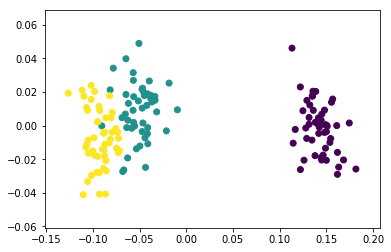

In [169]:
#Aplica PCA para duas dimensões
df_pca = PCA(n_components=2).fit_transform(df)

#Plota os dados em duas dimensões
fig,ax = plt.subplots()
ax.scatter(df_pca[:,0], df_pca[:,1], c=y)
plt.show()

In [170]:
# KMeans clustering
km = KMeans(n_clusters=3)
km.fit(df_pca)
clusters = km.predict(df_pca)

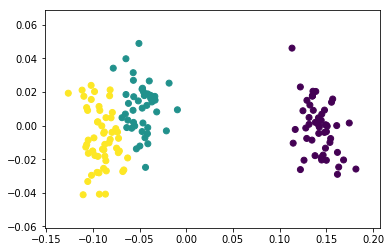

In [171]:
#Plota os dados em duas dimensões após kmeans
fig,ax = plt.subplots()
ax.scatter(df_pca[:,0], df_pca[:,1], c=clusters)
plt.show()

In [172]:
#Utilizar métricas de avaliação de clusteres (completeness e homogeneity)
score_homo = metrics.homogeneity_score(y,clusters)
score_comp = metrics.completeness_score(y,clusters) 

print('homogeneity = {0}'.format(score_homo))
print('completeness = {0}'.format(score_comp))

homogeneity = 0.8983263672602775
completeness = 0.9010648908640206


## Parte 2

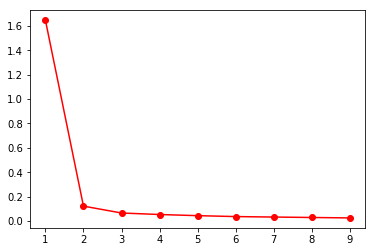

In [173]:
# Elbows method
clusters_result = []
for i in range(9):
    km = KMeans(n_clusters=i+1)
    km.fit(df_pca)   
    clusters_result.append(km.inertia_)
    
# Plotagens
plt.figure()
plt.plot(np.arange(1,10),clusters_result,'ro-')
plt.show()

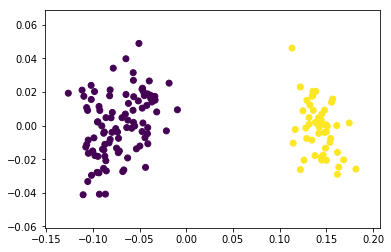

In [174]:
# KMeans clustering
km = KMeans(n_clusters=2)
km.fit(df_pca)
clusters = km.predict(df_pca)

#Plota os dados em duas dimensões
fig,ax = plt.subplots()
ax.scatter(df_pca[:,0], df_pca[:,1], c=clusters)
plt.show()

## Parte 3

In [175]:
#Utilizar métricas de avaliação de clusteres (completeness e homogeneity)
score_homo = metrics.homogeneity_score(y,clusters)
score_comp = metrics.completeness_score(y,clusters) 

print('homogeneity = {0}'.format(score_homo))
print('completeness = {0}'.format(score_comp))

homogeneity = 0.5793801642856945
completeness = 0.9999999999999997


## Conclusão

Para algoritmos de clusterização, o conhecimento sobre os dados é muito importante. Reduzindo as features para 2 componentes, através do PCA, deu para visualizar as classes e observar que uma classe é linearmente separável e as outras duas não. Com o conhecimento prévio, sobre o número de classes do dataset do iris. O kmeans com k = 3 deu um bom resultado, quando utilizado a euristica do método do cotovelo, o indicado foi usar duas classes, de acordo com a distância aos centroides, porém o resultado ficou pior. Indicando que o K = 3 é realmente uma boa escolha. Para este caso o método do cotovelo falhou, por causa da distribuição dos dados e isso foi em decorrência da normalização combinada com o PCA. Talvez com o uso de mais features, ou a utilização de outro tipo de normalização, a euristica funcionaria corretamente. 